In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
# Load the Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 13s 3us/step


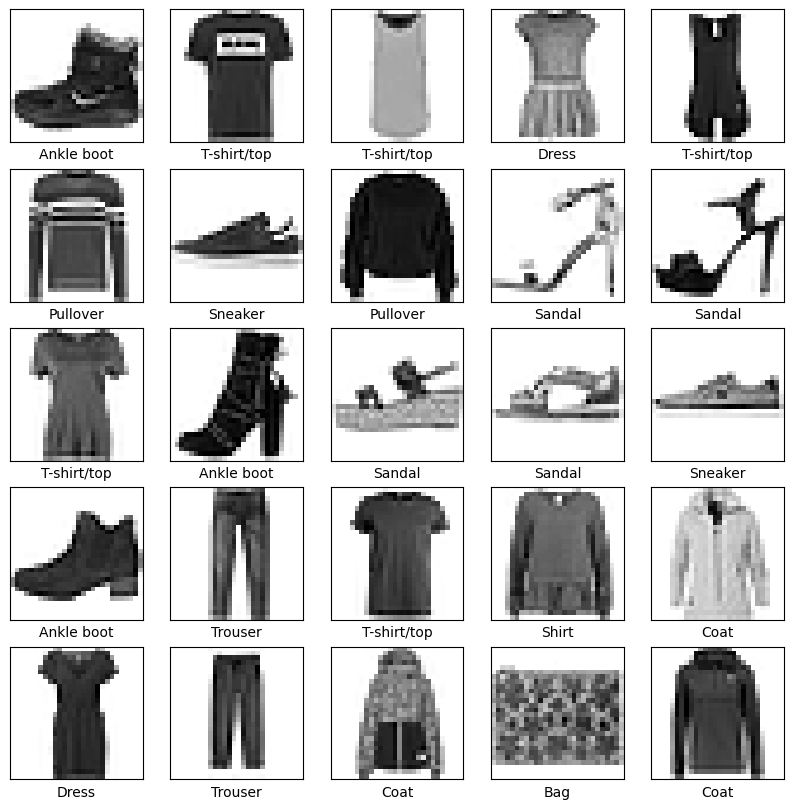

In [3]:
# Data Visualization
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [4]:
# Data Preprocessing
x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [5]:
# Model Architecture
model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [6]:
# Model Compilation
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [7]:
# Model Training
history = model.fit(x_train, y_train, epochs=10, validation_split=0.2)


Epoch 1/10


1500/1500 [==============================] - 6s 3ms/step - loss: 0.7973 - accuracy: 0.7441 - val_loss: 0.5761 - val_accuracy: 0.8049
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5391 - accuracy: 0.8187 - val_loss: 0.5093 - val_accuracy: 0.8234
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4871 - accuracy: 0.8335 - val_loss: 0.4709 - val_accuracy: 0.8393
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4591 - accuracy: 0.8423 - val_loss: 0.4538 - val_accuracy: 0.8408
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4398 - accuracy: 0.8477 - val_loss: 0.4382 - val_accuracy: 0.8450
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4260 - accuracy: 0.8524 - val_loss: 0.4274 - val_accuracy: 0.8493
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4134 - accuracy: 0.8575 - val_loss: 0.4157 - val_accurac

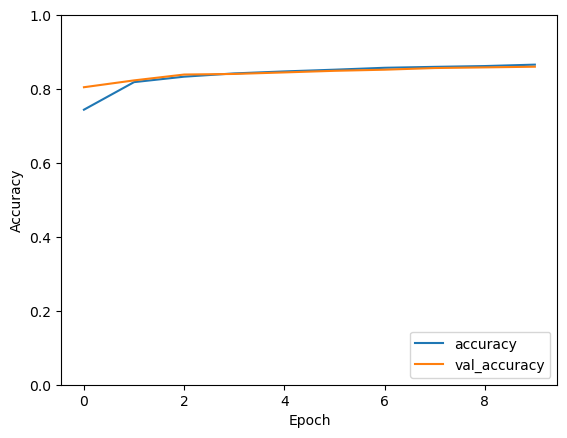

In [8]:
# Performance Evaluation
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

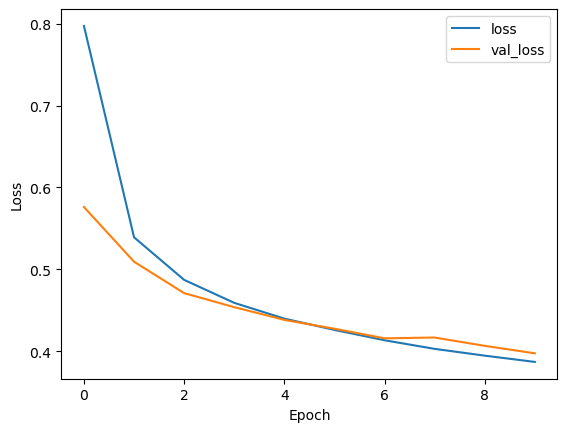

In [9]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

In [10]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.4201 - accuracy: 0.8516 - 816ms/epoch - 3ms/step

Test accuracy: 0.8515999913215637
